## Perceptron for logic gates (AND, OR, XOR...?)

* numpy version and visualization with matplotlib
* convention for variable names: lower-case for a scalar, upper-case for a vector or matrix

### [1] Data preparation

In [16]:
import numpy as np 

# variables are now transformed from list to numpy array
X_input = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_AND = np.array([0, 0, 0, 1])
Y_OR =  np.array([0, 1, 1, 1])
Y_XOR = np.array([0, 1, 1, 0])

n_data = X_input.shape[0]
dim_input = 1 + X_input.shape[1] # one bias + two input elements
dim_output = 1

### [2] Build a single-layer perceptron: input layer => output layer

In [57]:
# activation function of step
def step(z):
    if z > 0:
        y = 1
    else:
        y = 0
    return y
    

# build a single-layer perceptron: one sample => one output
def perceptron(W, X):
    X_ext = np.append(1, X) # extended input vector to that contains a bias: e.g., [0, 0] => [1, 0, 0]
    weighted_sum = np.dot(W, X_ext) # dot product
    y = step(weighted_sum)
    return y, X_ext

### [3] Train a neural network

In [101]:
# set a target output
Y_target = Y_AND
print('AND-gate')
print('Y_target =', Y_target, '\n')


# weight initialization
W = np.random.uniform(-1, 1, 3)
print('initial weight') 
print('W[0] = %.3f' %W[0], ', W[1] = %.3f' %W[1], ', W[2] = %.3f' %W[2], '\n')


# iterations
n_iter = 100 # number of update iterations
beta = 0.01 # learning rate
W_history = [W]

for n in range(n_iter):
    Y = np.zeros(n_data)
    
    for k in range(n_data):
        y_prediction, X_k = perceptron(W, X_input[k])
        Y[k] = y_prediction
        W += beta * (Y_target[k] - Y[k]) * X_k
        
    if n % 10 == 0: # if n is divided by 10
        print('iteration', n+1, ': W[0] = %.3f' %W[0], ', W[1] = %.3f' %W[1], ', W[2] = %.3f' %W[2],
              ', Y_prediction =', Y)
        
    W_history = np.append(W_history, [W], axis=0)

AND-gate
Y_target = [0 0 0 1] 

initial weight
W[0] = -0.067 , W[1] = 0.908 , W[2] = 0.206 

iteration 1 : W[0] = -0.087 , W[1] = 0.898 , W[2] = 0.196 , Y_prediction = [ 0.  1.  1.  1.]
iteration 11 : W[0] = -0.227 , W[1] = 0.798 , W[2] = 0.156 , Y_prediction = [ 0.  1.  0.  1.]
iteration 21 : W[0] = -0.327 , W[1] = 0.698 , W[2] = 0.156 , Y_prediction = [ 0.  1.  0.  1.]
iteration 31 : W[0] = -0.427 , W[1] = 0.598 , W[2] = 0.156 , Y_prediction = [ 0.  1.  0.  1.]
iteration 41 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y_prediction = [ 0.  0.  0.  1.]
iteration 51 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y_prediction = [ 0.  0.  0.  1.]
iteration 61 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y_prediction = [ 0.  0.  0.  1.]
iteration 71 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y_prediction = [ 0.  0.  0.  1.]
iteration 81 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y_prediction = [ 0.  0.  0.  1.]
iteration 91 : W[0] = -0.517 , W[1] = 0.508 , W[2] = 0.156 , Y

### [4] Visualization

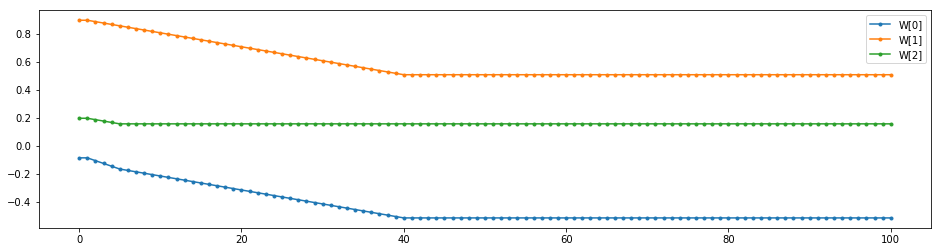

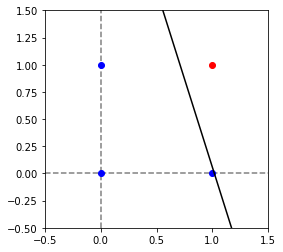

In [102]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(W_history[:, 0], '.-', label='W[0]')
plt.plot(W_history[:, 1], '.-', label='W[1]')
plt.plot(W_history[:, 2], '.-', label='W[2]')
plt.legend()
plt.show()


slope = -W[1] / W[2]
intercept = -W[0] / W[2]
X0 = np.linspace(-0.5, 1.5, 100)
Y0 = slope*X0 + intercept

plt.figure(figsize=(4, 4))
plt.plot([-0.5, 1.5], [0, 0], 'k--', alpha=0.5)
plt.plot([0, 0], [-0.5, 1.5], 'k--', alpha=0.5)
plt.plot(0, 0, 'bo')
plt.plot(1, 0, 'bo')
plt.plot(0, 1, 'bo')
plt.plot(1, 1, 'ro')
plt.plot(X0, Y0, 'k')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### [5] Altogether

Data
Input = [0 0] , Target = 0
Input = [1 0] , Target = 0
Input = [0 1] , Target = 0
Input = [1 1] , Target = 1

Initial weight
W[0] = 0.255 , W[1] = -0.192 , W[2] = -0.206 

iteration 1 : W[0] = 0.235 , W[1] = -0.192 , W[2] = -0.206 , Y_prediction = [ 1.  1.  1.  0.]
iteration 11 : W[0] = 0.155 , W[1] = -0.142 , W[2] = -0.136 , Y_prediction = [ 1.  0.  0.  0.]
iteration 21 : W[0] = 0.085 , W[1] = -0.082 , W[2] = -0.066 , Y_prediction = [ 1.  1.  0.  0.]
iteration 31 : W[0] = 0.015 , W[1] = -0.012 , W[2] = -0.006 , Y_prediction = [ 1.  0.  1.  0.]
iteration 41 : W[0] = -0.025 , W[1] = 0.008 , W[2] = 0.024 , Y_prediction = [ 0.  0.  0.  1.]
iteration 51 : W[0] = -0.025 , W[1] = 0.008 , W[2] = 0.024 , Y_prediction = [ 0.  0.  0.  1.]
iteration 61 : W[0] = -0.025 , W[1] = 0.008 , W[2] = 0.024 , Y_prediction = [ 0.  0.  0.  1.]
iteration 71 : W[0] = -0.025 , W[1] = 0.008 , W[2] = 0.024 , Y_prediction = [ 0.  0.  0.  1.]
iteration 81 : W[0] = -0.025 , W[1] = 0.008 , W[2] = 0.024 , Y_predic

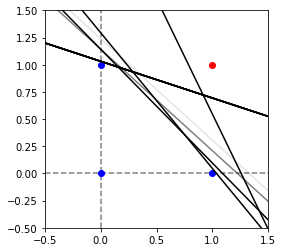

In [125]:
import numpy as np 
from matplotlib import pyplot as plt


# data preparation
X_input = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
n_data = X_input.shape[0]
dim_input = 1 + X_input.shape[1] # one bias + two input elements

Y_AND = np.array([0, 0, 0, 1])
Y_OR =  np.array([0, 1, 1, 1])
Y_XOR = np.array([0, 1, 1, 0])
Y_target = Y_AND
dim_output = 1

print('Data')
for i in range(n_data):
    print('Input =', X_input[i], ', Target =', Y_target[i])


# build a perceptron
def step(z):
    if z > 0:
        y = 1
    else:
        y = 0
    return y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def perceptron(W, X):
    X_ext = np.append(1, X) # extended input vector to that contains a bias: e.g., [0, 0] => [1, 0, 0]
    weighted_sum = np.dot(W, X_ext) # dot product
    y = step(weighted_sum)
    return y, X_ext


# training
W = np.random.uniform(-0.5, 0.5, 3)
print('\nInitial weight') 
print('W[0] = %.3f' %W[0], ', W[1] = %.3f' %W[1], ', W[2] = %.3f' %W[2], '\n')

n_iter = 100 # number of update iterations
beta = 0.01 # learning rate
W_history = [W]

slope = -W[1] / W[2]
intercept = -W[0] / W[2]
X0 = np.linspace(-0.5, 1.5, 100)
Y0 = slope*X0 + intercept

plt.figure(figsize=(4, 4))
plt.plot([-0.5, 1.5], [0, 0], 'k--', alpha=0.5)
plt.plot([0, 0], [-0.5, 1.5], 'k--', alpha=0.5)
plt.plot(0, 0, 'bo')
plt.plot(1, 0, 'bo')
plt.plot(0, 1, 'bo')
plt.plot(1, 1, 'ro')
plt.plot(X0, Y0, 'k', alpha=0.1) 
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

for n in range(n_iter):
    Y = np.zeros(n_data)
    
    for k in range(n_data):
        y_prediction, X_k = perceptron(W, X_input[k])
        Y[k] = y_prediction
        W += beta * (Y_target[k] - Y[k]) * X_k
        
    if n % 10 == 0: # if n is divided by 10
        print('iteration', n+1, ': W[0] = %.3f' %W[0], ', W[1] = %.3f' %W[1], ', W[2] = %.3f' %W[2],
              ', Y_prediction =', Y)
        slope = -W[1] / W[2]
        intercept = -W[0] / W[2]
        X0 = np.linspace(-0.5, 1.5, 100)
        Y0 = slope*X0 + intercept
        plt.plot(X0, Y0, 'k', alpha=sigmoid(n)) 
        
    W_history = np.append(W_history, [W], axis=0)
    
plt.show()